# Homework 3 DSCI510

--- 

 ***GITHUB LINK - https://github.com/dhand33p/USCDSCI510***

I collected data regarding CO2 emissions from different countries around the world, specfically the amount of emission they disperse in total share of the world. There is total of 209 countries for the first data source and 210 from the second source. I am collecting this data by scraping the two tables from the different websites. After I collect the two datasets, I need to clean the data and selet only certain aspects of the data(specifcally name and percentage for the first url). After I clean the data I will join the two datasets using join and create a datafram and eventually save into a CSV file. 

---

**Sources**

https://www.worldometers.info/co2-emissions/co2-emissions-by-country/

https://www.iqair.com/us/world-most-polluted-countries


### Most CO2 Emission Countries in percent share of world -Web Scraping
#### Data Cleaning  - Need to parse through the string and only select Country Name and percentage of CO2 Emission in Share of World

In [28]:
import requests
import bs4
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
url1 = "https://www.worldometers.info/co2-emissions/co2-emissions-by-country/"
req = requests.get(url1).text
soup = BeautifulSoup(req, "html.parser")
results = soup.find('table').find_all("tr") # Parsing through the table, and selecting all table row
list_count = []
for i in range(0, len(results)):
    country = results[i].text
    list_count.append(country)
#word = list_count[1]
dict_list = {}
for i in range(1, len(list_count)):
    temp = list_count[i]
    name = temp[3:20]
    result = ''.join([x for x in name if not x.isdigit()])
    fin_wrd = (re.sub(r"[^a-zA-Z]+", ' ', result)).strip()
    per_share = float(temp[-7:-2].replace(" ", ""))
    dict_list[fin_wrd] = per_share

#len(list_count) # 210 Countries
dict_list
df1 = pd.DataFrame([dict_list])
em = df1.T #switch rows and col
new = em.reset_index()
per_co2 = new.rename(columns={0: "CO2_emis_2016", "index" :"Country"})
per_co2

,Country,CO2_emis_2016
0,China,29.18
1,United States,14.02
2,India,7.09
3,Russia,4.65
4,Japan,3.47
...,...,...
204,Anguilla,0.00
205,Saint Helena,0.00
206,Saint Pierre,0.00
207,Faeroe Islands,0.00


Current problems - need to clean and filter the data collected, only select the name and last percentage column from table

### Most Polluted Countries Web Scraping
#### Need to select country name and latest pollution percentages in respect to WHO guidelines

In [25]:
url2 = "https://www.iqair.com/us/world-most-polluted-countries"
req2 = requests.get(url2).text
soup1 = BeautifulSoup(req2, "html.parser")
results1 = soup1.find('table').find("tbody")   # Fing the tbody section 
test = results1.find_all("tr")               # Select all table rows from the table 
list_cn = []
for i in range(0, len(test)):
    country = test[i].text
    list_cn.append(country)
len(list_cn) # 117 countries
dic_poll = {}
for i in range(1, len(list_cn)):
    temp = list_cn[i]
    char = ''.join([x for x in temp if not x.isdigit()])
    country = (re.sub(r"[^a-zA-Z]+", ' ', char)).strip()
    nums = re.sub(r"[^0-9.]+", ' ', temp).strip()
    list_nums = nums.split()
    #latest_num = re.findall("\d+\.\d+", nums)
    if len(list_nums[1]) > 1 :
        dic_poll[country] = float(list_nums[1])
    elif list_nums[1] == ".":
        dic_poll[country] = 4.5
        
df1 = pd.DataFrame([dic_poll])
pol = df1.T #switch rows and col
new = pol.reset_index()
per_poll = new.rename(columns={0: "Poll_2021", "index" :"Country"})
per_poll.iloc[[88]]
per_poll.loc[88,['Country']] = "United States"
per_poll.iloc[88]

Country      United States
Poll_2021             10.3
Name: 88, dtype: object

### Combining two dataframes into one and into CSV file - merged them based on country name

In [26]:
all_col = pd.merge(per_co2, per_poll, on="Country")
all_col.to_csv('co2andpoll.csv', index=False)
all_col.head()

,Country,CO2_emis_2016,Poll_2021
0,China,29.18,32.6
1,United States,14.02,10.3
2,India,7.09,58.1
3,Russia,4.65,12.3
4,Japan,3.47,9.1


In [41]:
argd = all_col.sort_values(by =  "CO2_emis_2016", ascending = False)
argd = argd.head(5)

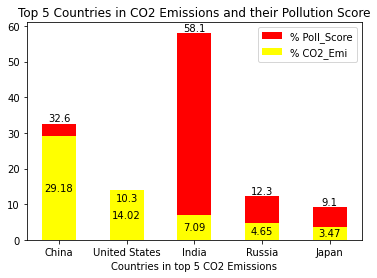

In [88]:
barWidth = .5

p1 = plt.bar(argd["Country"], argd["Poll_2021"], width=barWidth, color='red')
p2 = plt.bar(argd["Country"], argd["CO2_emis_2016"], width=barWidth, color='yellow')

#plt.ylabel('')
plt.xlabel('Countries in top 5 CO2 Emissions')
plt.title('Top 5 Countries in CO2 Emissions and their Pollution Score')
plt.legend((p1[0], p2[0]), ('% Poll_Score', '% CO2_Emi'))


plt.bar_label(p1)
plt.bar_label(p2, label_type='center')   
    
#display chart
plt.show()